In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/random-linear-regression/train.csv
/kaggle/input/random-linear-regression/test.csv


In [2]:
train = pd.read_csv("/kaggle/input/random-linear-regression/train.csv")

In [3]:
train.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [4]:
test = pd.read_csv("/kaggle/input/random-linear-regression/test.csv")

In [5]:
test.head()

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864


In [6]:
train.tail()

,x,y
695,58.0,58.595006
696,93.0,94.625094
697,82.0,88.603770
698,66.0,63.648685
699,97.0,94.975266


In [7]:
train.sample

<bound method NDFrame.sample of         x          y
0    24.0  21.549452
1    50.0  47.464463
2    15.0  17.218656
3    38.0  36.586398
4    87.0  87.288984
..    ...        ...
695  58.0  58.595006
696  93.0  94.625094
697  82.0  88.603770
698  66.0  63.648685
699  97.0  94.975266

[700 rows x 2 columns]>

In [8]:
train.shape

(700, 2)

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


In [10]:
#Data Cleaning 
# 1.Null Values Findout
# 2. outliers detect & remove

In [11]:
train.isnull().count()

x    700
y    700
dtype: int64

In [12]:
train['x'].isnull().count()

700

In [13]:
train['y'].isnull().count()

700

In [14]:
train['x'].value_counts()

58.000000      16
49.000000      14
16.000000      13
24.000000      13
25.000000      13
               ..
63.000000       3
82.000000       2
69.000000       2
40.000000       2
3530.157369     1
Name: x, Length: 102, dtype: int64

In [15]:
train['y'].value_counts()

21.549452     1
38.462137     1
1.576584      1
17.461814     1
2.116113      1
             ..
58.372660     1
87.220597     1
102.496786    1
43.883143     1
94.975266     1
Name: y, Length: 699, dtype: int64

In [16]:
train["x"].describe()

count     700.000000
mean       54.985939
std       134.681703
min         0.000000
25%        25.000000
50%        49.000000
75%        75.000000
max      3530.157369
Name: x, dtype: float64

In [17]:
train["y"].describe()

count    699.000000
mean      49.939869
std       29.109217
min       -3.839981
25%       24.929968
50%       48.973020
75%       74.929911
max      108.871618
Name: y, dtype: float64

In [18]:
#EDA 

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: Second argument 'y' is ambiguous: could be a format string but is in 'data'; using as data.  If it was intended as data, set the format string to an empty string to suppress this warning.  If it was intended as a format string, explicitly pass the x-values as well.  Alternatively, rename the entry in 'data'.
  """Entry point for launching an IPython kernel.


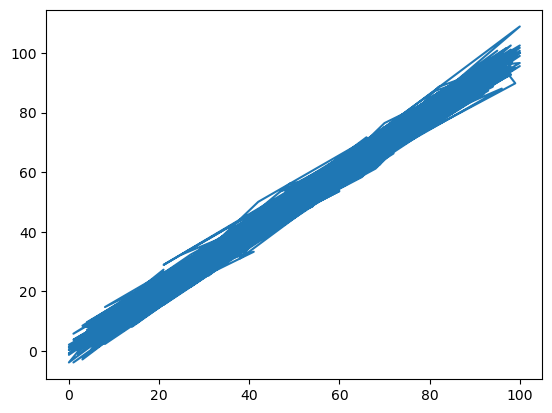

In [19]:
plt.plot('x','y', data=train)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fad60b01b10>,
 'caps': [<matplotlib.lines.Line2D at 0x7fad60b09190>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fad60b01910>],
 'medians': [<matplotlib.lines.Line2D at 0x7fad60b09850>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fad60b09b90>],
 'means': []}

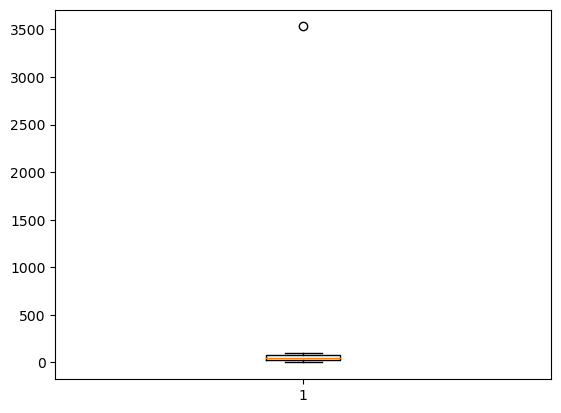

In [20]:
plt.boxplot("x", data = train)

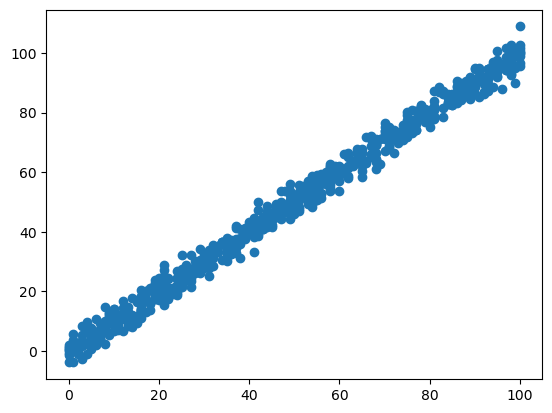

In [21]:
plt.scatter('x','y', data=train)

<BarContainer object of 700 artists>

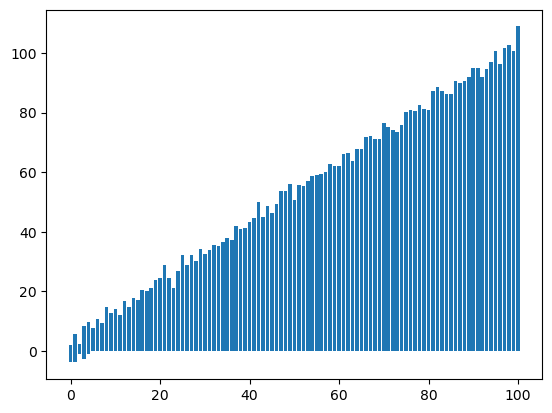

In [22]:
plt.bar('x','y', data=train)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fad529e5290>,
 'caps': [<matplotlib.lines.Line2D at 0x7fad52a05710>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fad529f8d50>],
 'medians': [<matplotlib.lines.Line2D at 0x7fad52a05dd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fad52a12150>],
 'means': []}

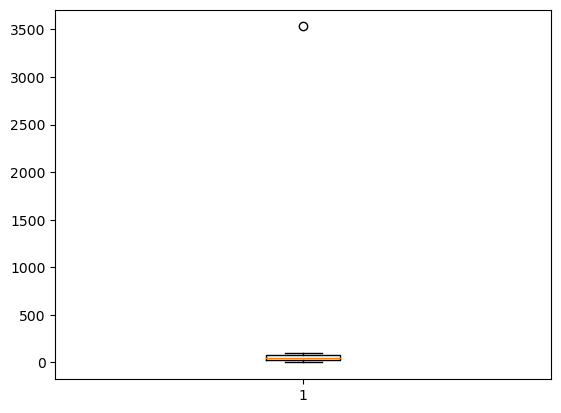

In [23]:
plt.boxplot("x",data=train)

In [24]:
train = train.dropna()

In [25]:
train.shape

(699, 2)

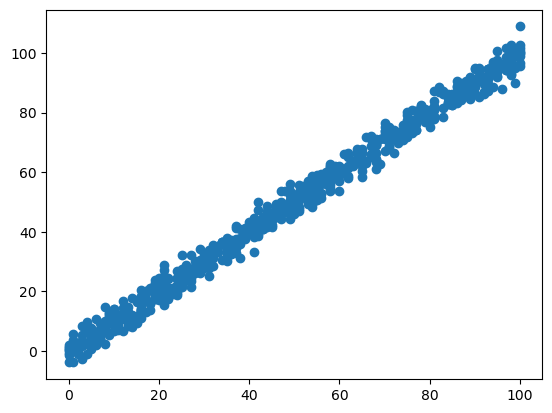

In [26]:
plt.scatter('x','y', data=train)

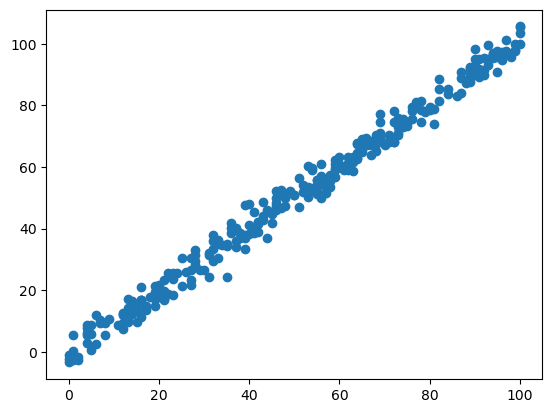

In [27]:
plt.scatter('x','y', data=test)

In [28]:
# model 
#1. simple linear regression

In [29]:
from sklearn import linear_model

In [30]:
slr = linear_model.LinearRegression()

In [31]:
x_train = np.array(train.iloc[:, :-1].values)
y_train = np.array(train.iloc[:, :1].values)
x_test = np.array(test.iloc[:, :-1].values)
y_test = np.array(test.iloc[:, :1].values)

In [32]:
slr.fit(x_train,y_train)

LinearRegression()

In [33]:
# y = mx+c
# _coeff  (coefficient/slope/m)
# _intercept  (bias/intercept)

In [34]:
slr.coef_

array([[1.]])

In [35]:
slr.intercept_

array([-1.42108547e-14])

In [36]:
y_pred = slr.predict(x_test)

In [37]:
y_pred

array([[ 7.70000000e+01],
       [ 2.10000000e+01],
       [ 2.20000000e+01],
       [ 2.00000000e+01],
       [ 3.60000000e+01],
       [ 1.50000000e+01],
       [ 6.20000000e+01],
       [ 9.50000000e+01],
       [ 2.00000000e+01],
       [ 5.00000000e+00],
       [ 4.00000000e+00],
       [ 1.90000000e+01],
       [ 9.60000000e+01],
       [ 6.20000000e+01],
       [ 3.60000000e+01],
       [ 1.50000000e+01],
       [ 6.50000000e+01],
       [ 1.40000000e+01],
       [ 8.70000000e+01],
       [ 6.90000000e+01],
       [ 8.90000000e+01],
       [ 5.10000000e+01],
       [ 8.90000000e+01],
       [ 2.70000000e+01],
       [ 9.70000000e+01],
       [ 5.80000000e+01],
       [ 7.90000000e+01],
       [ 2.10000000e+01],
       [ 9.30000000e+01],
       [ 2.70000000e+01],
       [ 9.90000000e+01],
       [ 3.10000000e+01],
       [ 3.30000000e+01],
       [ 8.00000000e+01],
       [ 2.80000000e+01],
       [ 4.70000000e+01],
       [ 5.30000000e+01],
       [ 6.90000000e+01],
       [ 2.8

In [38]:
accuracy = slr.score(x_test,y_test)

In [39]:
print(accuracy)

1.0


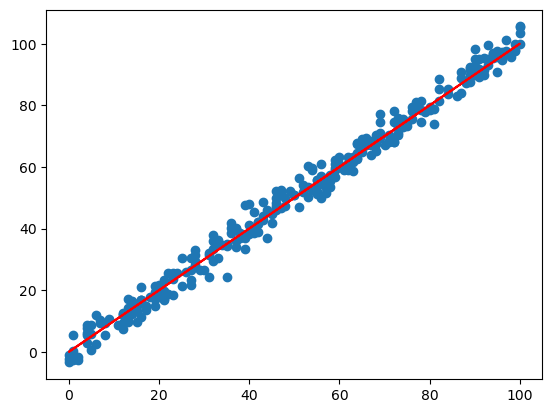

In [40]:
plt.plot(x_test,y_pred, color ='red')
plt.scatter('x','y', data=test)
plt.show()

In [41]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [42]:
mean_absolute_error(y_test, y_pred)

5.087041898832467e-15

In [43]:
mean_squared_error(y_test, y_pred)

5.389678485094066e-29

In [44]:
r2_score(y_test, y_pred)

1.0